# Programming Assignment \# 1

__Goal:__ 

This programming assignment will ask you to do the following tasks.

(a) Implement some of the sorting algorithms for sorting integer data in ascending order in python3.
  - Simple sort (implemented for you)
  - Bubble Sort (read from book or online sources)
  - Merge Sort
  - Quicksort 
  
  
(b) Your implementation must count the number of *compare* operations each sorting algorithm carries out.
    
(c) You must formulate a series of arrays of lengths from $5$ to $100$  (step by 5), that will form the worst case of these
sorting algorithms and plot the number of comparisons in the __worst case__ vs. size of input array (x axis)
 
(d) Generate $1000$ random inputs for each size and compute average time. Plot the size of input array (x axis) vs. number of comparisons (y axis)

----
## Simple Sort

In [90]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def simple_sort(a):
    # must sort the array a in place and return the number of comparisons
    num_compare = 0
    n = len(a)
    for i in range(0, n): # i goes from 0 to n-1
        for j in range(i+1, n): # j goes from i+1 to n-1
            num_compare = num_compare + 1
            if a[i] >= a[j]:
                # swap
                a[i], a[j] = a[j], a[i]
    return num_compare

In [91]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = simple_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  45
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity analysis of simple sort.

Note that simple sort consists of two loops and regardless of the input array, the first loop runs from n steps. And the second loop runs $n-i-1$ steps where $i$ is the index of the first loop. Thus, the worst case, best case and average case complexity should be $\sum_{j=1}^{n-1} j = \frac{n(n-1)}{2}$ comparisons = $\Theta(n^2)$

The code below plots it for arrays of size 5, 10, ..., 100. However, we cannot really distinguish between the number of comparisons for randomized vs. worst case.

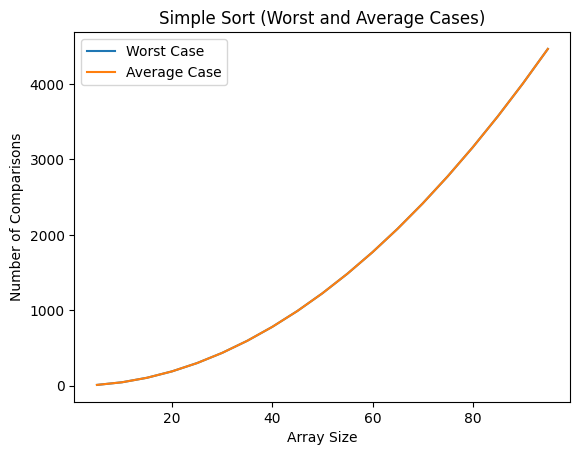

In [92]:
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = simple_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = simple_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Simple Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----

### Bubble Sort

In [93]:
def bubble_sort(a):
    i = 0
    j = 0
    n = len(a)
    num_compares = 0
    for j in range(1, n):
        for i in range(n-1):
            if a[i] > a[i+1]:
                num_compares += 1
                temp = a[i]
                a[i] = a[i+1]
                a[i+1] = temp 
    return num_compares

# array = [2,4,5,1,6,8,3]
# res = bubble_sort(array)
# print(res)
# print(array)

### Complexity Analysis of Bubble Sort

Bubble sort is an algorithm that compares elements in a list that are next to each other and swaps them accordingly. It is very similar to simple sort, as they both contain nested loops. Similarly, these nested for loops increase the time complexity of the algorithm. This means the algorithm has a time complexity of $\Theta(n^2)$ in the average case and $O(n^2)$ in the worst case. 

The worst case for bubble sort occurs when the input is in reverse sorted order. Meaning, bubble sort sorts an array in ascending order and the input array is in descending order, or vice versa.

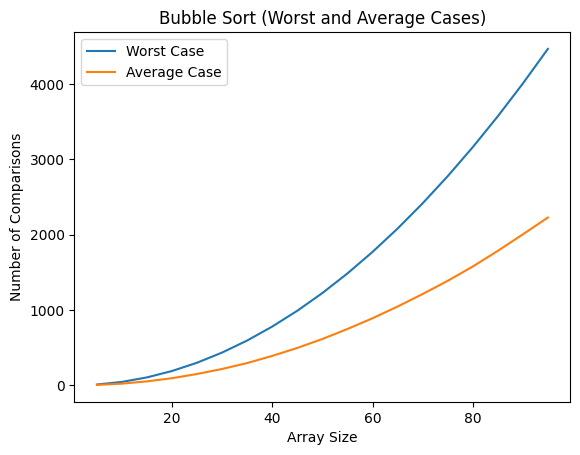

In [125]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
# Python program to generate Worst Case of Merge Sort

num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    a.reverse()
    nc = bubble_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = bubble_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Bubble Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Merge Sort

In [128]:
def merge_sort(a):
    num_compares = merge_sort_recursive(a)
    a[:] = num_compares[0] 
    return num_compares[1]

def merge_sort_recursive(arr, num_compares=0):
    if len(arr) <= 1:
        return arr, num_compares
    
    middle = len(arr) // 2
    lower = arr[:middle]
    upper = arr[middle:]
    
    left, num_compares = merge_sort_recursive(lower, num_compares)
    right, num_compares = merge_sort_recursive(upper, num_compares)
    
    result, merge_compares = merge(left, right)
    num_compares += merge_compares
    
    return result, num_compares

def merge(left, right):
    i = 0
    j = 0
    k = 0
    n = len(left)
    m = len(right)
    full_lst = [0 for _ in range(n + m)]
    num_compares = 0
    
    while i < n and j < m:
        if left[i] <= right[j]:
            full_lst[k] = left[i]
            i += 1
            k += 1
        else:
            full_lst[k] = right[j]
            j += 1
            k += 1
        num_compares += 1
    
    while i < n:
        full_lst[k] = left[i]
        i += 1
        k += 1
    
    while j < m:
        full_lst[k] = right[j]
        j += 1
        k += 1
    
    return full_lst, num_compares

array = [0, 3, 2, 4, 1]
num_compares = merge_sort(array)
print(num_compares)
print(array)
# array1 = [10,9,8,7,6,5,4,3,2,1,0]
array1 = [0,1,2,3,4,5,6,7,8,9,10]
num_compares1 = merge_sort(array1)
print(num_compares1)


8
[0, 1, 2, 3, 4]
17


### Complexity Analysis of Merge Sort

Merge Sort is a Divide and Conquer algorithm. The underlying logic of merge sort is to divide each array into two halves until each subarray has only one element. The dividing step is done recursively. When the arrays are divided into subarrays, they are compared and therefore sorted. Each half of the array is now sorted and the merge step combines these arrays to form the final sorted array. 

For the complexity analysis of this sorting algorithm, it has an average time complexity of $\Theta(n log (n))$. Its worst case time complexity is the same, at $O(n log (n))$ as well.

It was difficult to find a worst case input for this algorithm. Multiple resources revealed that an alternating list like $[1, 3, 5, 7, 2, 4, 6, 8]$, or that either in ascending or descending order would be the worst input for merge sort. After manipulating the worst case input, the theoretical worst cases performed better than the average cases. Different types of array orders were experimented with but none yielded more comparisons than the random arrays. This is also evidence that the average and worst time complexity is the same.


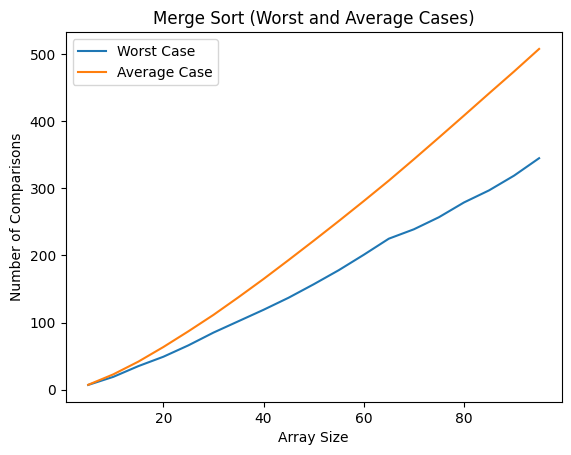

In [135]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n) 
    # a.reverse()
    b = [x for i, x in enumerate(a) if i % 2 == 0]
    c = [x for i, x in enumerate(a) if i % 2 != 0]
    worst_case_list = c + b
    # print(worst_case_list)
    nc = merge_sort(worst_case_list)
    num_compares_wc.append(nc)  

num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        # print(a)
        nc = merge_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
# print(num_compares_wc)
plt.plot(array_sizes, num_compares_random, label='Average Case')
# print(num_compares_random)
plt.legend(['Worst Case', 'Average Case'])
plt.title('Merge Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()
# [7, 19, 31, 48, 64, 77, 96, 116, 136, 153, 170, 184, 199, 227, 252, 272, 297, 317, 334] descending order
# [5, 15, 28, 40, 54, 71, 85, 100, 115, 133, 151, 172, 193, 205, 220, 240, 255, 275, 298] ascending order
# [8, 23, 37, 57, 75, 91, 112, 135, 157, 177, 196, 213, 230, 261, 288, 311, 338, 361, 380] reverse then alternating order
# [7, 19, 35, 49, 66, 85, 102, 119, 137, 157, 178, 201, 225, 239, 257, 279, 297, 319, 345] alternating order
# [7.187, 22.756, 41.683, 63.585, 86.983, 111.481, 137.828, 165.1, 193.227, 221.932, 251.261, 280.999, 311.367, 343.52, 375.685, 407.942, 441.243, 474.272, 507.486] randomised

----
### Quick Sort


In [136]:
def quick_sort(a):
    num_compares = [0]
    quick_sort_helper(a, 0, len(a) - 1, num_compares)
    return num_compares[0]

def quick_sort_helper(a, left, right, num_compares):
    if left < right:
        x, compares = partition(a, left, right)
        num_compares[0] += compares
        quick_sort_helper(a, left, x - 1, num_compares)
        quick_sort_helper(a, x + 1, right, num_compares)

def partition(a, left, right):
    pivot = a[right]
    i = left - 1
    j = left
    num_compares = 0

    while j < right:
        num_compares += 1 
        if a[j] < pivot:
            i += 1
            swap(a, i, j)
        j += 1

    swap(a, i + 1, right)
    return i + 1, num_compares

def swap(a, i, j):
    a[i], a[j] = a[j], a[i]
    
    
# a0 = [1, 4, 5, 6, 2, 3, 90, 87, 44]
# print(quick_sort(a0))
# print(a0)

### Complexity Analysis of Quick Sort

Quicksort is another divide and conquer algorithm. It occupies less space than merge sort, as it does the sorting in place. It consists of selecting a pivot, partitioning the array and placing all elements less than the pivot to the left of the array. This algorithm is fairly quick, as it has an average time complexity of $\Theta(n log n)$

The worst case in the quicksort algorithm comes when the algorithm is already sorted. Interestingly enough, from the code provided in the simple sort to generate the graphs, it was found that quicksort does the same amount of comparisons with a descending order array and with an ascending order one. Choosing a bad pivot may result in a worsened time complexity. This may happen when the largest element in the array is selected as the pivot. In the worst case, quicksort has a time complexity of $O(n^2)$

[10, 45, 105, 190, 300, 435, 595, 780, 990, 1225, 1485, 1770, 2080, 2415, 2775, 3160, 3570, 4005, 4465]


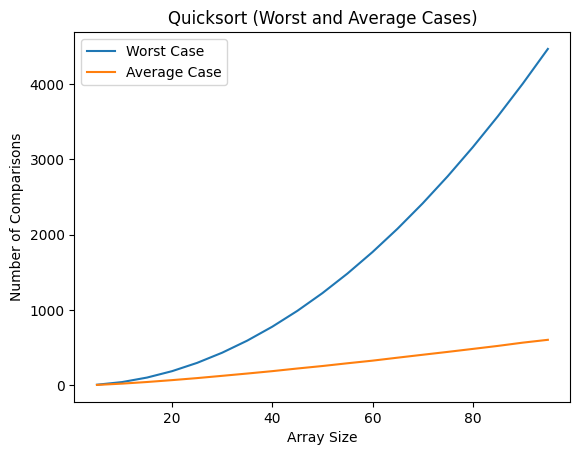

In [137]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
#    added reverse for a descending sorted array
    # a.reverse()
    nc = quick_sort(a)
    num_compares_wc.append(nc)
    

num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = quick_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
print(num_compares_wc)
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Quicksort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

# [10, 45, 105, 190, 300, 435, 595, 780, 990, 1225, 1485, 1770, 2080, 2415, 2775, 3160, 3570, 4005, 4465] ascending order
# [10, 45, 105, 190, 300, 435, 595, 780, 990, 1225, 1485, 1770, 2080, 2415, 2775, 3160, 3570, 4005, 4465] descending

-----
## Testing Code: Do not edit



In [138]:
def test_sorting_algorithm(sort_fun, sz, num_trials):
    num_passed = 0
    for i in range(num_trials):
        a = create_random_shuffled_array(sz)
        a_orig = list(a) # make a copy
        b = sorted(a)
        nc = sort_fun(a)
        if a == b:
            num_passed = num_passed + 1
        else:
            print('----')
            print('FAILED: Input = ', a_orig)
            print('Expected: ', b)
            print('Obtained:', a)
            print('----')
    print('Num Trials = ', num_trials)
    print('Num Passed = ', num_passed)

In [139]:
test_sorting_algorithm(simple_sort, 50, 100)

Num Trials =  100
Num Passed =  100


In [140]:
test_sorting_algorithm(bubble_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [141]:
test_sorting_algorithm(merge_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [142]:
test_sorting_algorithm(quick_sort, 10, 10)

Num Trials =  10
Num Passed =  10
